In [21]:
import tellurium as te
import numpy as np

r = te.loada("""

J1: ->P; r
J2: P->C; f1*P
J3: C->P; f2*C
J4: C->S; f3*C

#equilibration of capping/uncapping of telomerase
J5: U + E -> R; k1*U*E
J6: R -> U + E; k2*R


R = 64
U = 0
E = 300
k2 = 0.000385
k1 = 0.0005


P = 0
C = 0
S = 0

#capping/uncapping parameter names
#U = Uncapped, E = Cdc13, R = Capped


#HeLa
r = .70
f1 = 1.8
f2 = 1
f3 = 0.26



#reversible C event
#event instance of cancer, ROS, etc., disease
//E1: at (time>16) : C = C+20;

#S event
//E3: at (time>20): S = S+15


""")

In [22]:
#m = r.gillespie(0,150,100)
m = r.gillespie(0,30,100,['Time','P','C','S'])
r.plot()

In [22]:
#basic sim
#m = r.gillespie(0,80,100)
m = r.simulate(0,10,100)

r.plot()

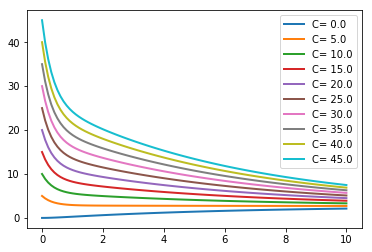

In [40]:
#Time series param scans (x3)

#r.conservedMoietyAnalysis = True
label = []
m = r.simulate(0,10,100,['Time'])
for C in np.arange(0,50,5.0):
    r.reset()
    r.C = C
    n=r.simulate(0,10,100,['C'])
    m = np.hstack([m,n])
    label.append("C= "+str(C))
    
#r.plot()
te.plotArray(m,labels = label)

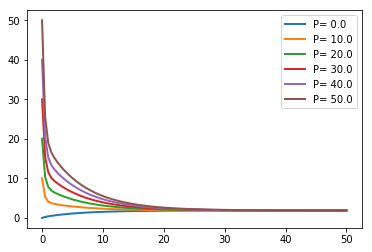

In [42]:
label = []
m = r.simulate(0,50,100,['Time'])
for P in np.arange(0,60,10.0):
    r.reset()
    r.P = P
    n=r.simulate(0,50,100,['P'])
    m = np.hstack([m,n])
    label.append("P= "+str(P))
    
#r.plot()
te.plotArray(m,labels = label)

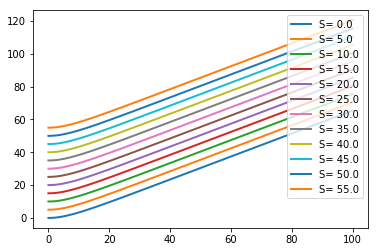

In [39]:
label = []
m = r.simulate(0,100,100,['Time'])
for S in np.arange(0,60,5.0):
    r.reset()
    r.S = S
    n=r.simulate(0,100,100,['S'])
    m = np.hstack([m,n])
    label.append("S= "+str(S))
    
#r.plot()
te.plotArray(m,labels = label)